1. Загрузити файл з даними про споживання енергії “En_In.xls”, який являє
собою перелік показників енергозабезпечення та виробництва відновлюваної
електроенергії, і ввести їх в DataFrame.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)

energy_table = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38, usecols=[2, 3, 4, 5], names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])
energy_table.set_index('Country', inplace=True)
print(energy_table)

                          Energy Supply Energy Supply per Capita  % Renewable
Country                                                                      
Afghanistan                         321                       10        78.67
Albania                             102                       35       100.00
Algeria                            1959                       51         0.55
American Samoa                      ...                      ...         0.64
Andorra                               9                      121        88.70
...                                 ...                      ...          ...
Viet Nam                           2554                       28        45.32
Wallis and Futuna Islands             0                       26         0.00
Yemen                               344                       13         0.00
Zambia                              400                       26        99.71
Zimbabwe                            480                       32

2. Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж
= 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з
"....."), переконайтеся, що це відображається як значення np.NaN.

In [3]:
energy_table['Energy Supply'] = energy_table['Energy Supply'].replace('...', np.NaN)
energy_table['Energy Supply'] = energy_table['Energy Supply'] * 1000000
print(energy_table['Energy Supply'])

Country
Afghanistan                  321000000.00
Albania                      102000000.00
Algeria                     1959000000.00
American Samoa                        NaN
Andorra                        9000000.00
                                 ...     
Viet Nam                    2554000000.00
Wallis and Futuna Islands            0.00
Yemen                        344000000.00
Zambia                       400000000.00
Zimbabwe                     480000000.00
Name: Energy Supply, Length: 227, dtype: float64


3. Перейменуйте наступний список країн:
"Republic of Korea": "South Korea",
"United States of America": "United States", "
United Kingdom of Great Britain and Northern Ireland": "United
Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"

In [4]:
new_names = {"Republic of Korea": "South Korea", "United States of America20": "United States", "United Kingdom of Great Britain and Northern Ireland19": "United Kingdom", "China, Hong Kong Special Administrative Region3": "Hong Kong"} 
energy_table.rename(index=new_names, inplace=True)
print(energy_table.loc["South Korea"], "\n", energy_table.loc["United States"], "\n", energy_table.loc["United Kingdom"], "\n", energy_table.loc["Hong Kong"]) 

Energy Supply              11007000000.00
Energy Supply per Capita              221
% Renewable                          2.28
Name: South Korea, dtype: object 
 Energy Supply              90838000000.00
Energy Supply per Capita              286
% Renewable                         11.57
Name: United States, dtype: object 
 Energy Supply              7920000000.00
Energy Supply per Capita             124
% Renewable                        10.60
Name: United Kingdom, dtype: object 
 Energy Supply              585000000.00
Energy Supply per Capita             82
% Renewable                        0.00
Name: Hong Kong, dtype: object


4. Існує також декілька країн, що мають в назві цифри та/або дужки.
Обов’язково видаліть їх, напр. 'Bolivia (Plurinational State of)'
повинна бути ‘Bolivia’, ‘Switzerland17’ повинна бути Switzerland’.

In [5]:
energy_table.index = energy_table.index.str.replace(r" \(.*\)|[0-9]", "", regex=True)
print(energy_table.iloc[133])

Energy Supply              2000000.00
Energy Supply per Capita           21
% Renewable                      2.94
Name: Micronesia, dtype: object


5. Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані
Світового банку про ВВП країн від 1960 до 2015 року.

In [6]:
gpd_table = pd.read_csv('gpd.csv', skiprows=4)
gpd_rename = {"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"}
gpd_table.rename(columns={'Country Name': 'Country'}, inplace=True)
gpd_table.set_index('Country', inplace=True)
gpd_table.rename(index=gpd_rename, inplace=True)
print(gpd_table.iloc[123])

Country Code                                           KOR
Indicator Name    GDP at market prices (constant 2010 US$)
Indicator Code                              NY.GDP.MKTP.KD
1960                                        27576960757.43
1961                                        28938253834.68
1962                                        29649660482.42
1963                                        32475783404.67
1964                                        34931355042.46
1965                                        36744341227.48
1966                                        41410872518.01
1967                                        43936951529.24
1968                                        49077491649.41
1969                                        55997453545.50
1970                                        63203503772.42
1971                                        69802723539.32
1972                                        74347466779.72
1973                                        85341610691.

6. Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі
їхніх публікацій в журналах у галузі енергетичного машинобудування та
енергетичних технологій.

In [7]:
scimagojr_table = pd.read_excel('scimagojr.xlsx')
scimagojr_table.set_index('Country', inplace=True) 
print(scimagojr_table)

                    Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   
...                  ...        ...                ...        ...   
Guyana               187          1                  1          0   
Christmas Island     188          1                  1          0   
Reunion              189          1                  1          2   
Saint Lucia          190          1                  1          0   
Mauritania           191          1                  1          1   

                    Self-citations  Citations per document  H index  
Country                         

7. Приєднайте три набори даних із завдань 1-6 до нового набору даних
(використовуючи перетин назв країн).
- Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і
лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
- Індексом цього DataFrame повинна бути назва країни, а стовпцями мають
бути ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '%
Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
'2015'].
Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.

In [8]:
merged_table = pd.merge(scimagojr_table, energy_table, how='inner', left_index=True, right_index=True)
merged_table = pd.merge(merged_table, gpd_table, how='inner', left_index=True, right_index=True)
necessary_columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations','Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
merged_table = merged_table[necessary_columns]
merged_table = merged_table.head(15)
print(merged_table)
print("\n", merged_table.shape)

                    Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   
Canada                 6      17899              17620     215003   
Germany                7      17027              16831     140566   
India                  8      15005              14841     128763   
France                 9      13153              12973     130632   
South Korea           10      11983              11923     114675   
Italy                 11      10964              10794     111850   
Spain                 12       9428               9330     123336   
Iran                  13       889

8. Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.
Ця функція повинна повертати об’єкт Series з 15 країнами та їх середній
ВВП, відсортований за спаданням.

In [9]:
def average_GPD(table):
    return table.loc[:, '2006':'2015'].mean(axis=1).sort_values(ascending=False)
print(average_GPD(merged_table))

Country
United States        15364344302990.00
China                 6348608932836.10
Japan                 5542207638235.18
Germany               3493025339072.85
France                2681724635761.59
United Kingdom        2487906661418.42
Brazil                2189794143774.91
Italy                 2120175089933.78
India                 1769297396603.86
Canada                1660647466307.51
Russian Federation    1565459478480.66
Spain                 1418078278145.69
Australia             1164042729991.43
South Korea           1106714508244.85
Iran                   444155754051.09
dtype: float64


9. Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10
років для країни з 5-м середнім ВВП.

In [10]:
def GPD_change(table):
    country_average_GPD = average_GPD(table)
    fifth_country = country_average_GPD.index[4]
    GPD_2015 = table.loc[fifth_country, '2015']
    GPD_2006 = table.loc[fifth_country, '2006']
    GPD_change = GPD_2015 - GPD_2006
    return fifth_country, GPD_change
print(GPD_change(merged_table))

('France', 153345695364.24023)


10. Створіть функцію, щоб визначити, в якій країні встановлено максимум
поновлюваних джерел енергії (% Renewable) та який саме відсоток.

In [11]:
def most_renewable_country(table):
    max_renewable = table['% Renewable'].idxmax()
    max_percentage = table.loc[max_renewable, '% Renewable']
    return max_renewable, max_percentage
print(most_renewable_country(merged_table))

('Brazil', 69.64803)


11. Створіть стовпець, в якому оцінюється чисельність населення. Для
пошуку оцінки використовуйте значення енергопостачання (Energy Supply)
та енергопостачання на душу населення (Energy Supply per capita). Яка країна
є шостою за цією оцінкою?

In [12]:
def population_estimate(table):
    table['Population Estimate'] = table['Energy Supply'] / table['Energy Supply per Capita']
    sixth_country = table['Population Estimate'].sort_values(ascending=False).index[5]
    population = table.loc[sixth_country, 'Population Estimate']
    return sixth_country, population
print(population_estimate(merged_table))

('Japan', 127409395.97315437)


12. Створіть стовпець, в якому оцінюється кількість цитованих документів на
одну особу. Який взаємозв'язок між кількістю цитованих документів на
душу населення та енергозабезпеченням на душу населення? Використовуйте
метод .corr () (кореляція Пірсона).

In [13]:
def citable_documents(table):
    table['Citable documents per Capita'] = table['Citable documents'] / (table['Energy Supply'] / table['Energy Supply per Capita'])
    used_columns = table[['Citable documents per Capita', 'Energy Supply per Capita']]
    correlation = used_columns.corr().iloc[0, 1]
    return correlation if not pd.isna(correlation) else np.nan
print(citable_documents(merged_table))

0.7940010435442945


13. Створіть новий стовпчик в який занесіть 1, якщо значення %
відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для
всіх країн, і 0, якщо значення (% Renewable) нижче медіани.

In [14]:
def is_mostly_renewable(table):
    median_renewable = table['% Renewable'].median()
    table['Bigger than average renewable'] = table['% Renewable'] >= median_renewable
    return table['Bigger than average renewable'].astype(int)
print(is_mostly_renewable(merged_table))

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Bigger than average renewable, dtype: int32


14. Використайте наступний словник, щоб згрупувати країни за
континентами, потім створіть DataFrame, який відображає розмір вибірки
(кількість країн на кожному континенті), а також суму, середнє та стандартне
відхилення для оцінки кількості населення для кожної країни.

In [15]:
ContinentDict = {'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia', 'United Kingdom': 'Europe', 'Russian Federation': 'Europe', 'Canada': 'North America', 'Germany': 'Europe', 'India': 'Asia', 'France': 'Europe', 'South Korea': 'Asia', 'Italy': 'Europe', 'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia', 'Brazil': 'South America'}

def assign_continent(table, continent_dict):
    table['Continent'] = pd.Series(continent_dict)
    resulting_table = table.groupby('Continent')['Energy Supply'].agg(['size', 'sum', 'mean', 'std'])
    return resulting_table
    
print(assign_continent(merged_table, ContinentDict))


               size             sum           mean            std
Continent                                                        
Asia              5 199549000000.00 39909800000.00 49702036464.31
Australia         1   5386000000.00  5386000000.00            NaN
Europe            6  73940000000.00 12323333333.33  9482712410.84
North America     2 101269000000.00 50634500000.00 56856334954.87
South America     1  12149000000.00 12149000000.00            NaN


15. Створіть бульбашкову діаграму, що відображає залежність % поновлюван
их джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки від
повідає ВВП країн 2015 року, а колір відповідає континенту.

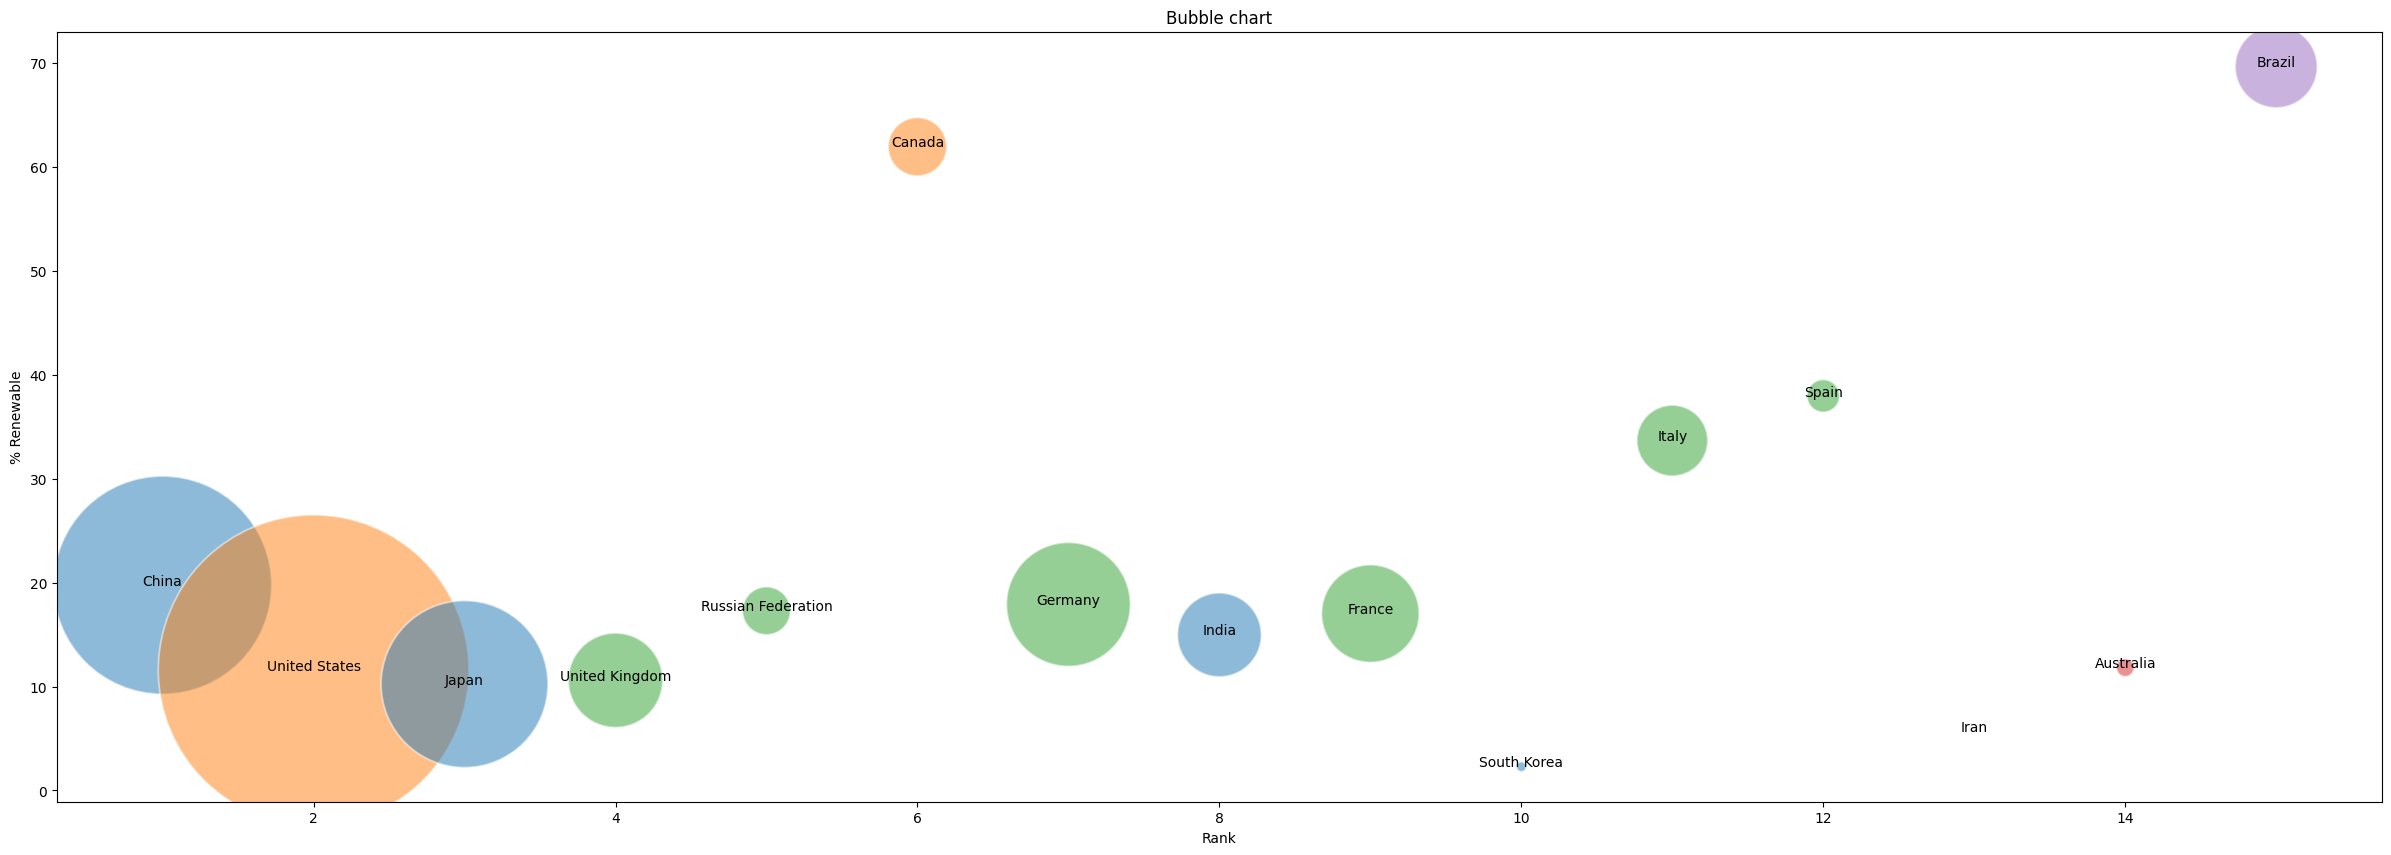

In [16]:
def bubble_chart(table):
    plt.figure(figsize=(30, 10))
    sns.scatterplot(x='Rank', y='% Renewable', size='2015', hue='Continent', data=table, sizes=(50, 50000), alpha = 0.5, legend=False)
    plt.title('Bubble chart')
    plt.xlabel('Rank')
    plt.ylabel('% Renewable')
    for index, i in table.iterrows(): # Я сподіваюсь тут for допустимий, це ж не в середині структур даних, а щоб зручніше побудувати графік
        plt.annotate(index, (i['Rank'], i['% Renewable']), textcoords="offset points", xytext=(0, 0), ha='center')
    plt.show()

bubble_chart(merged_table)